# Tito Nicola Drugman - 502552 - Cluster Analysis

Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset?select=shopping_trends_updated.csv

Dataset Glossary (Column-wise)

* Customer ID - Unique identifier for each customer
* Age - Age of the customer
* Gender - Gender of the customer (Male/Female)
* Item Purchased - The item purchased by the customer
* Category - Category of the item purchased
* Purchase Amount (USD) - The amount of the purchase in USD
* Location - Location where the purchase was made
* Size - Size of the purchased item
* Color - Color of the purchased item
* Season - Season during which the purchase was made
* Review Rating - Rating given by the customer for the purchased item
* Subscription Status - Indicates if the customer has a subscription (Yes/No)
* Shipping Type - Type of shipping chosen by the customer
* Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)
* Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)
* Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
* Payment Method - Customer's most preferred payment method
* Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import missingno as msno

pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_raw = pd.read_csv('shopping_trends_updated.csv')
df_raw = shuffle(df_raw, random_state=24)

# Preprocessing

In [3]:
df_raw.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
57,58,21,Male,Coat,Outerwear,64,West Virginia,M,White,Summer,4.40,Yes,Store Pickup,Yes,Yes,17,Debit Card,Fortnightly
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.90,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
2299,2300,64,Male,Coat,Outerwear,57,Idaho,M,Violet,Summer,3.70,No,Store Pickup,No,No,48,Credit Card,Every 3 Months
3716,3717,57,Female,Shirt,Clothing,53,Vermont,M,Charcoal,Fall,3.40,No,Next Day Air,No,No,42,Debit Card,Every 3 Months
104,105,55,Male,Sunglasses,Accessories,24,New Hampshire,L,Pink,Spring,4.40,Yes,2-Day Shipping,Yes,Yes,1,PayPal,Monthly
1527,1528,26,Male,Hat,Accessories,75,Wisconsin,L,Red,Fall,4.50,No,2-Day Shipping,Yes,Yes,33,Debit Card,Fortnightly
3760,3761,65,Female,Socks,Clothing,80,Connecticut,M,Peach,Fall,3.10,No,Next Day Air,No,No,36,PayPal,Weekly
506,507,28,Male,Scarf,Accessories,40,Georgia,M,Olive,Fall,2.70,Yes,2-Day Shipping,Yes,Yes,48,Debit Card,Annually
2790,2791,34,Female,Socks,Clothing,63,Maine,M,Black,Spring,4.50,No,Free Shipping,No,No,24,Debit Card,Annually
3319,3320,23,Female,Shorts,Clothing,31,North Dakota,M,Indigo,Summer,4.30,No,Next Day Air,No,No,17,Credit Card,Every 3 Months


In [4]:
df_raw.shape

(3900, 18)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 57 to 418
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   objec

<Axes: >

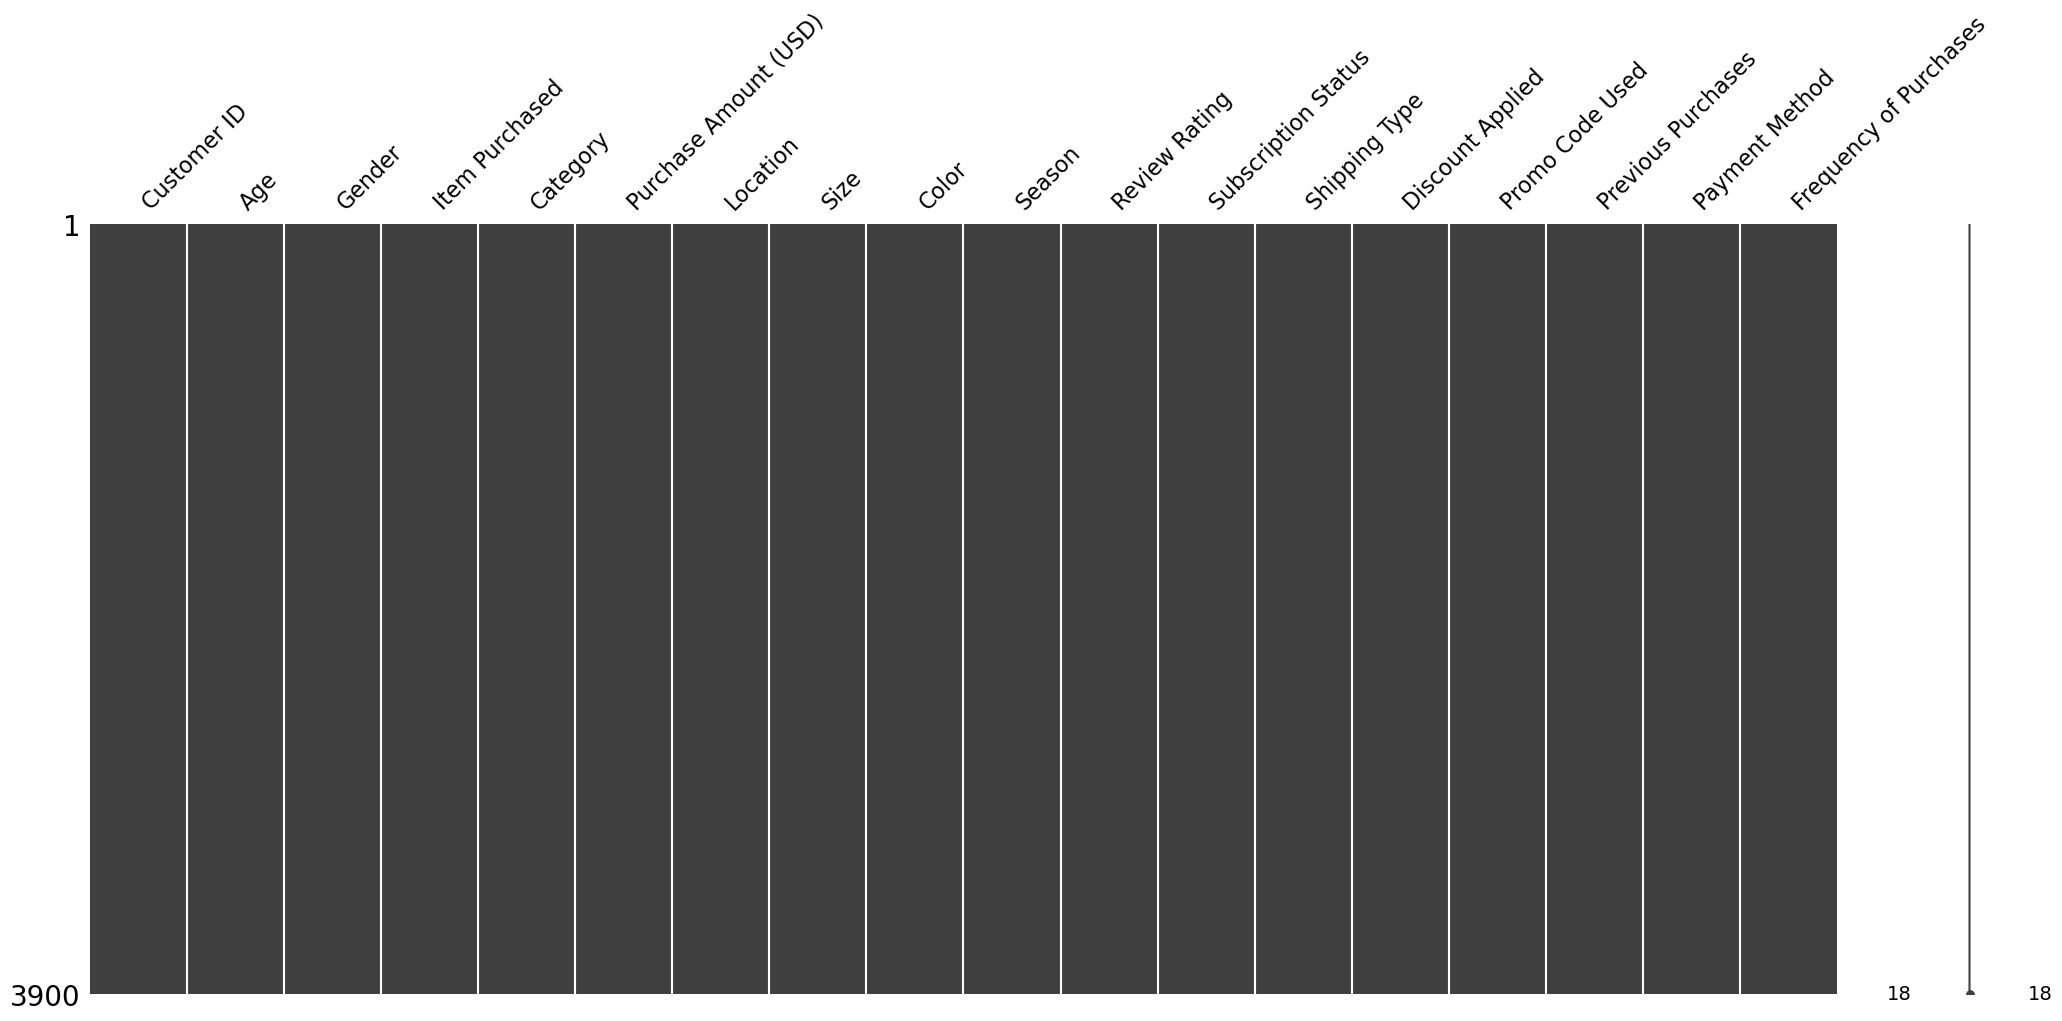

In [6]:
msno.matrix(df_raw)

In [7]:
df_raw.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


In [8]:
df_raw.duplicated().sum()

0

In [9]:
categorical_cols = (df_raw.dtypes[df_raw.dtypes == 'object'].index)
numerical_cols = (df_raw.dtypes[df_raw.dtypes != 'object'].index).drop('Customer ID')

# Categorical Variables

In [10]:
print(categorical_cols)

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [11]:
for column in categorical_cols:
        print("Column: {} - Unique Values: {}".format(column, df_raw[column].unique()))
        print("")
        print("="*80)
        print("")

Column: Gender - Unique Values: ['Male' 'Female']


Column: Item Purchased - Unique Values: ['Coat' 'Skirt' 'Shirt' 'Sunglasses' 'Hat' 'Socks' 'Scarf' 'Shorts'
 'Backpack' 'Jewelry' 'Sandals' 'Hoodie' 'Belt' 'Dress' 'Blouse' 'Handbag'
 'Pants' 'Gloves' 'Jeans' 'T-shirt' 'Boots' 'Jacket' 'Shoes' 'Sweater'
 'Sneakers']


Column: Category - Unique Values: ['Outerwear' 'Clothing' 'Accessories' 'Footwear']


Column: Location - Unique Values: ['West Virginia' 'Connecticut' 'Idaho' 'Vermont' 'New Hampshire'
 'Wisconsin' 'Georgia' 'Maine' 'North Dakota' 'Delaware' 'Tennessee'
 'Mississippi' 'Montana' 'Illinois' 'Maryland' 'Virginia' 'Washington'
 'South Dakota' 'Louisiana' 'Alabama' 'New York' 'Nebraska' 'Arkansas'
 'Ohio' 'Iowa' 'Nevada' 'Kentucky' 'New Mexico' 'Alaska' 'Rhode Island'
 'Michigan' 'Florida' 'Minnesota' 'North Carolina' 'Kansas' 'California'
 'South Carolina' 'Pennsylvania' 'Massachusetts' 'Wyoming' 'Oregon'
 'Arizona' 'Indiana' 'Utah' 'Oklahoma' 'Texas' 'New Jersey' 'Missouri'

In [12]:
def cat_plot_count(df, column_name, color='skyblue', rotation_angle=45):
    # use to plots a histogram for the specified column in the given DataFrame.

    counts = df[column_name].value_counts()

    fig, ax = plt.subplots()
    counts.plot(kind='bar', ax=ax, color=color)

    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 1, str(i.get_height()), ha='center', va='bottom')

    ax.set_xlabel(column_name.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {column_name.capitalize()}')

    plt.xticks(rotation=rotation_angle, ha='right')

    plt.tight_layout()
    plt.show()

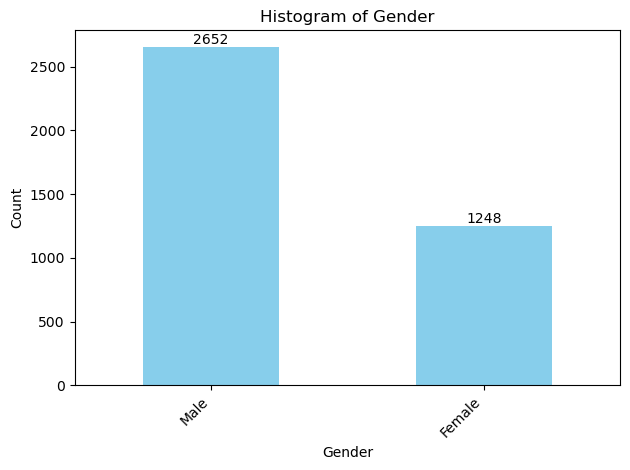

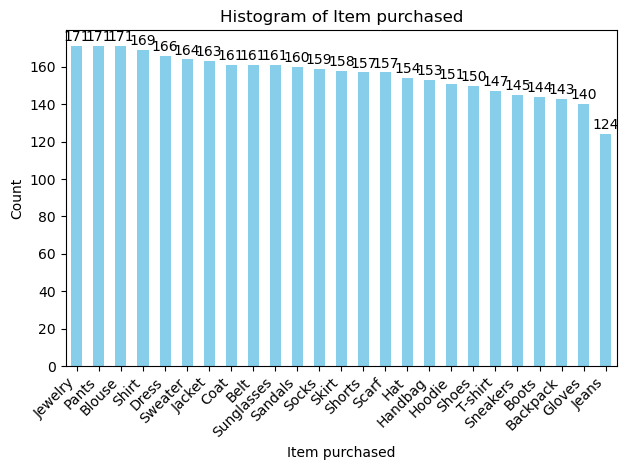

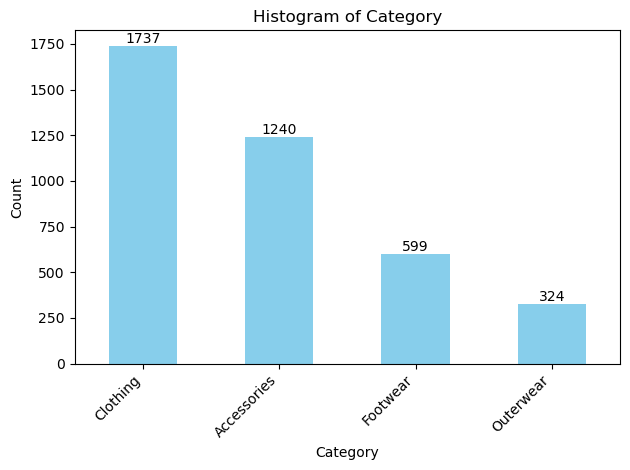

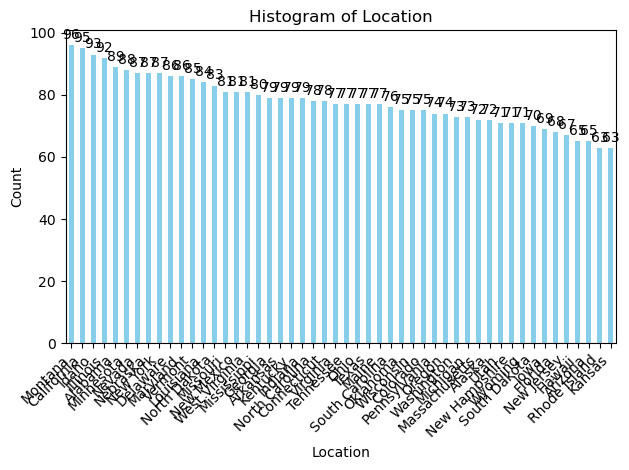

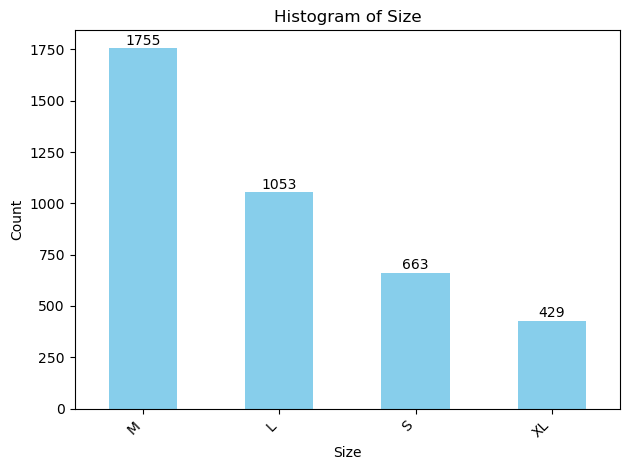

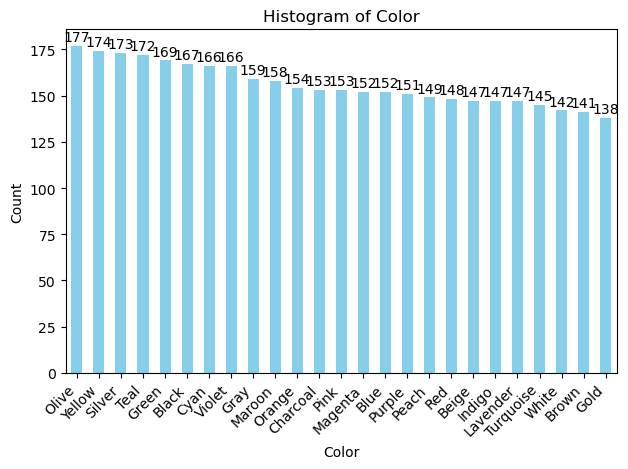

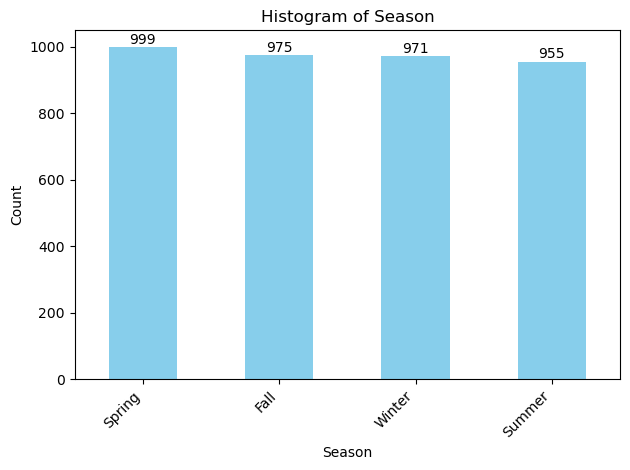

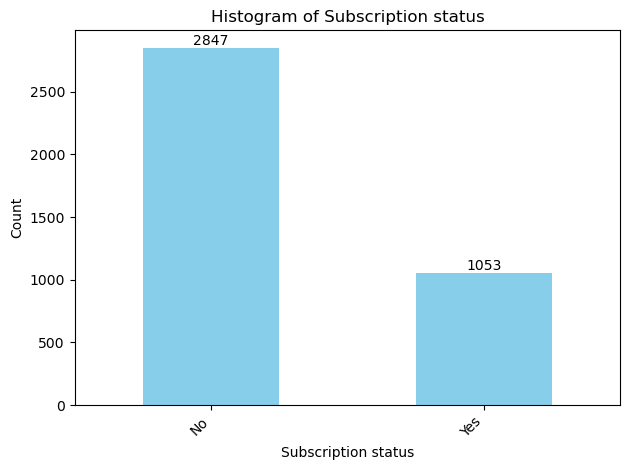

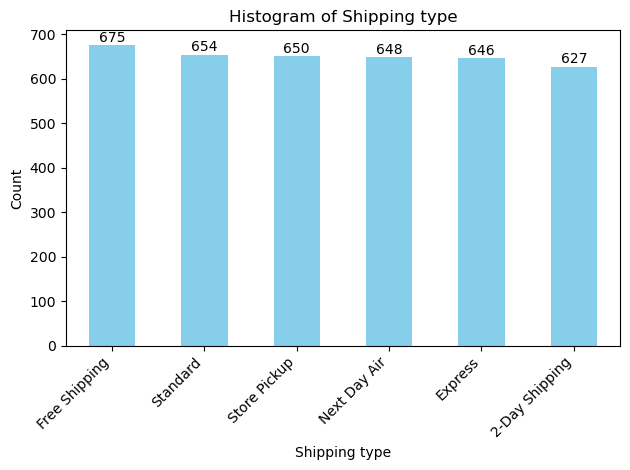

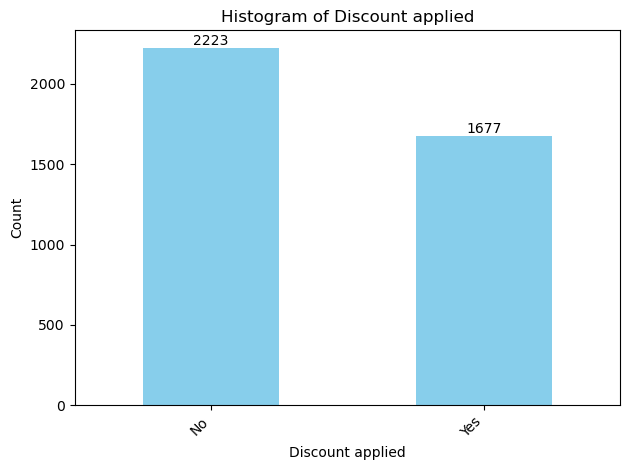

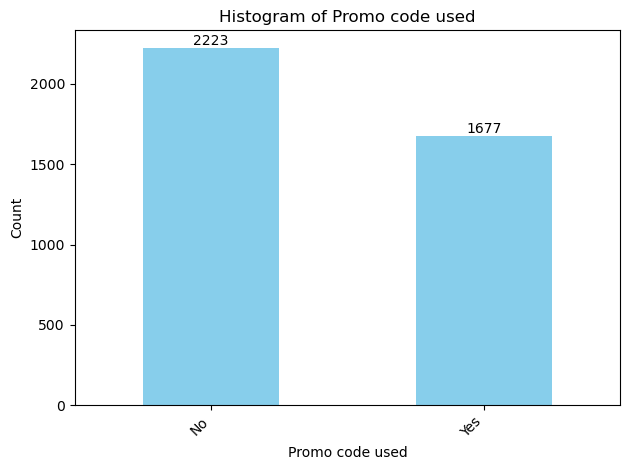

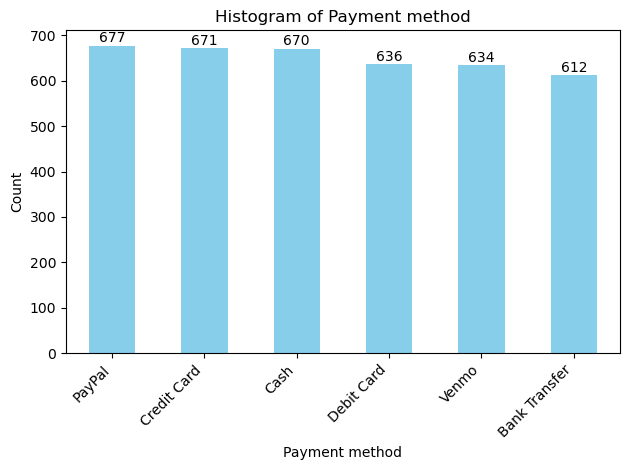

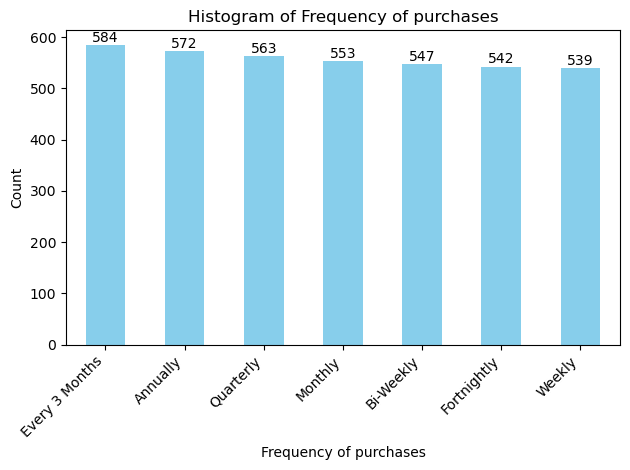

In [13]:
for col in categorical_cols:
    cat_plot_count(df_raw, col)


# Numerical Variables

In [14]:
print(numerical_cols)

Index(['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'], dtype='object')


In [15]:
df_raw[numerical_cols].describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Age,3900.00,44.07,15.21,18.00,18.00,23.00,31.00,44.00,57.00,65.00,68.00,70.00,70.00
Purchase Amount (USD),3900.00,59.76,23.69,20.00,20.00,27.00,39.00,60.00,81.00,93.00,96.05,99.00,100.00
Review Rating,3900.00,3.75,0.72,2.50,2.50,2.80,3.10,3.70,4.40,4.70,4.90,5.00,5.00
Previous Purchases,3900.00,25.35,14.45,1.00,1.00,5.00,13.00,25.00,38.00,46.00,48.00,50.00,50.00


In [16]:
def num_plot_count(df, column_name, figsize=(21, 9), color='blue', style='ggplot'):
    plt.figure(figsize=figsize)
    plt.style.use(style)
    sns.countplot(x=column_name, data=df, color=color)
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Observations')
    plt.title(f'Number of Observations by {column_name.capitalize()}')
    plt.show()


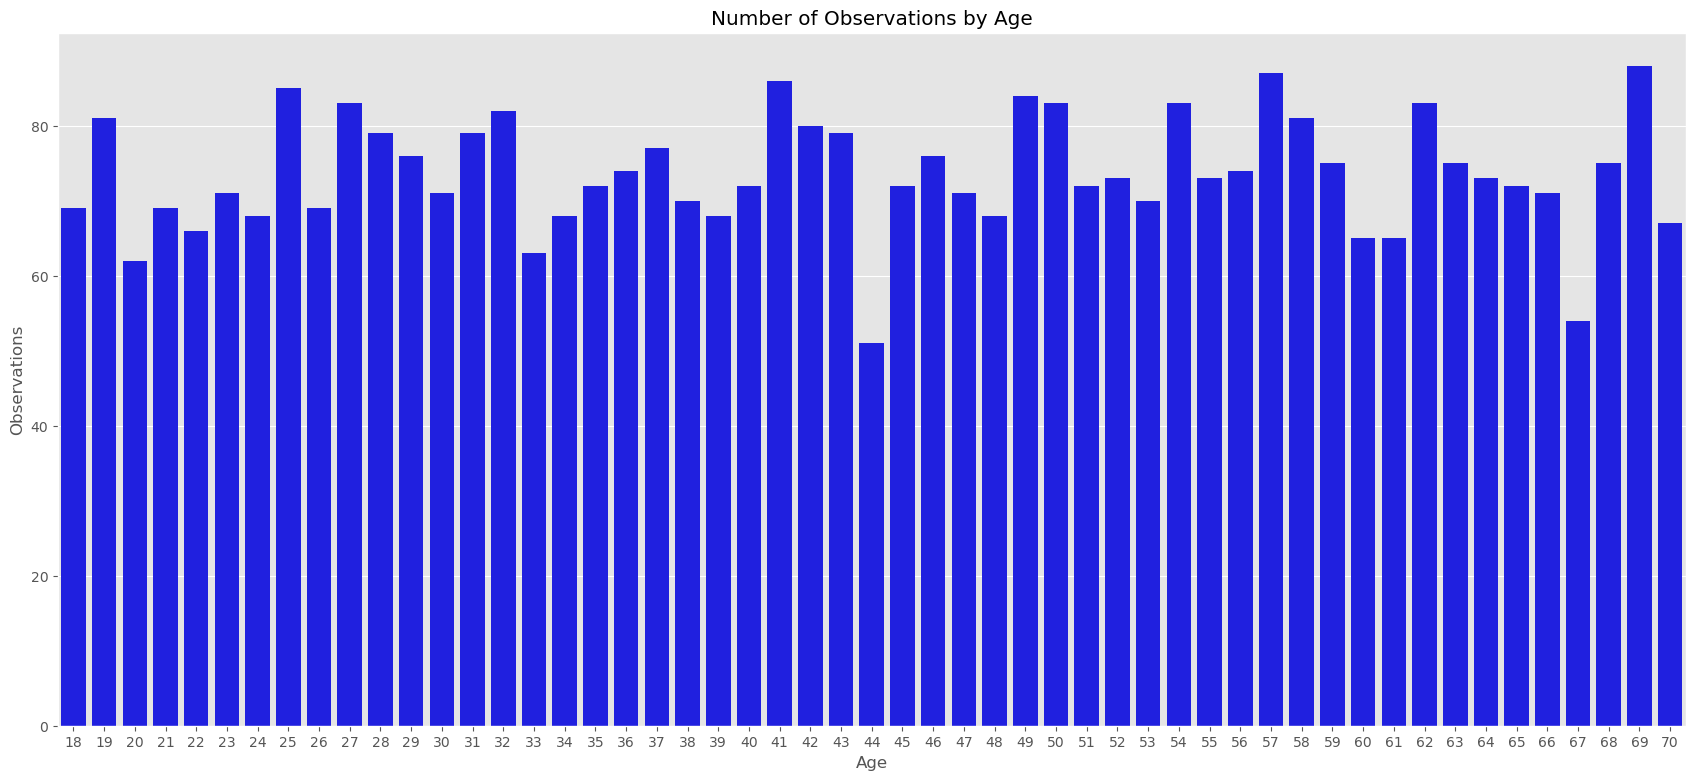

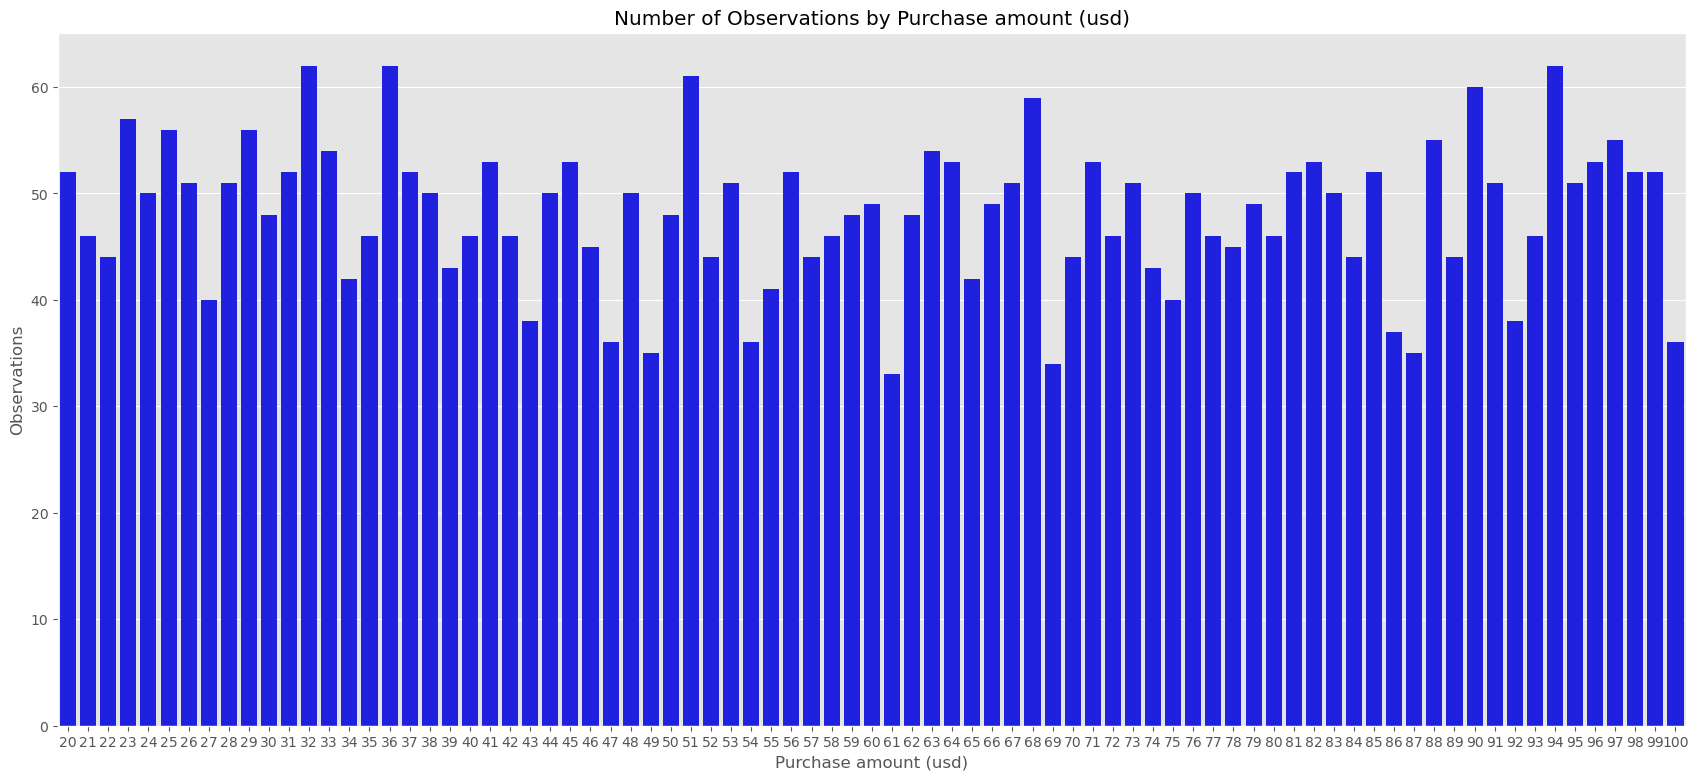

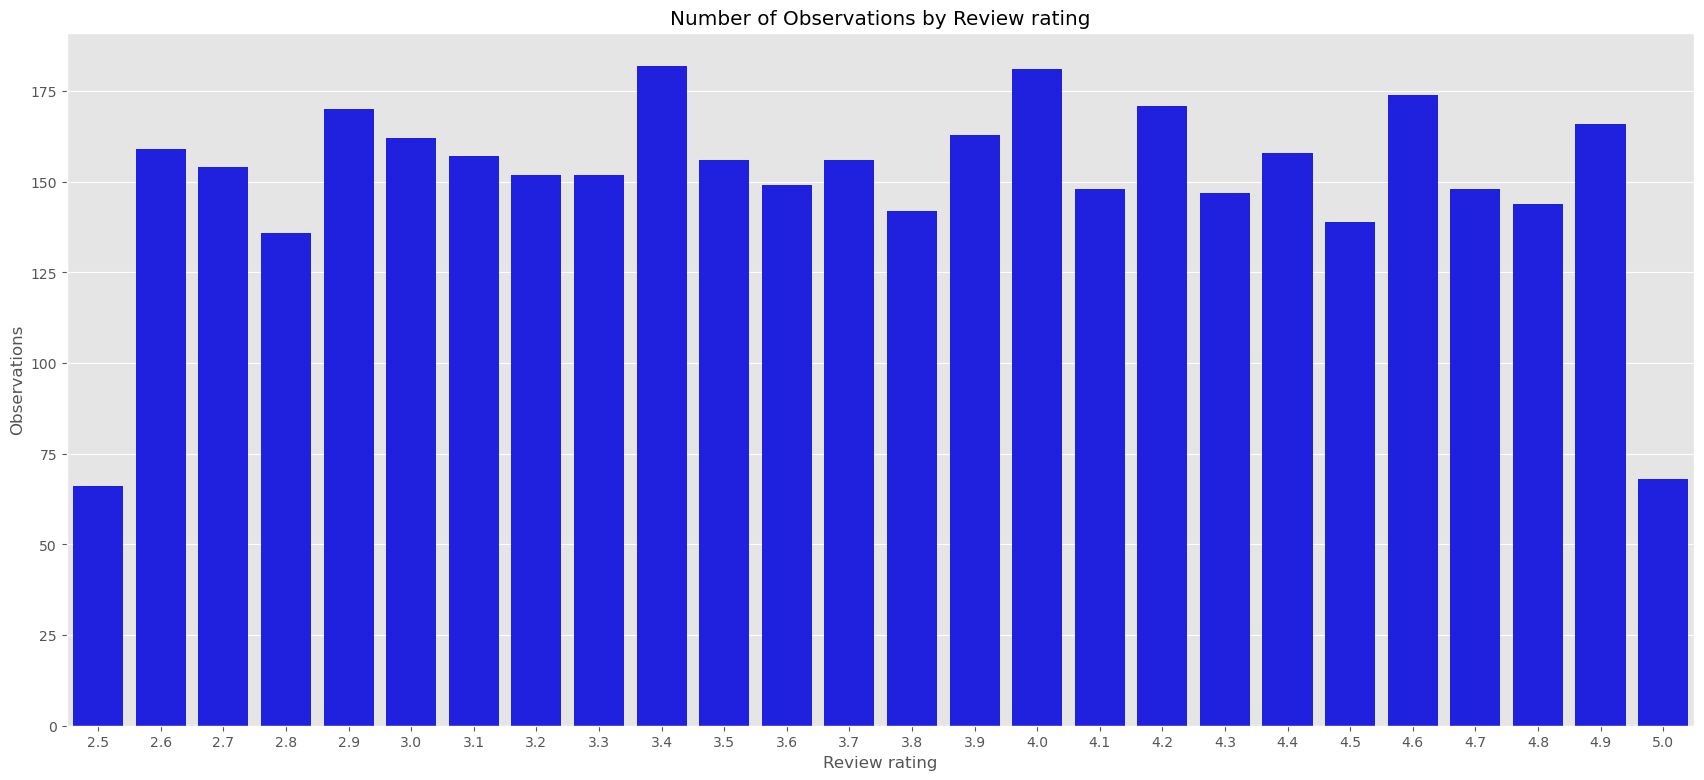

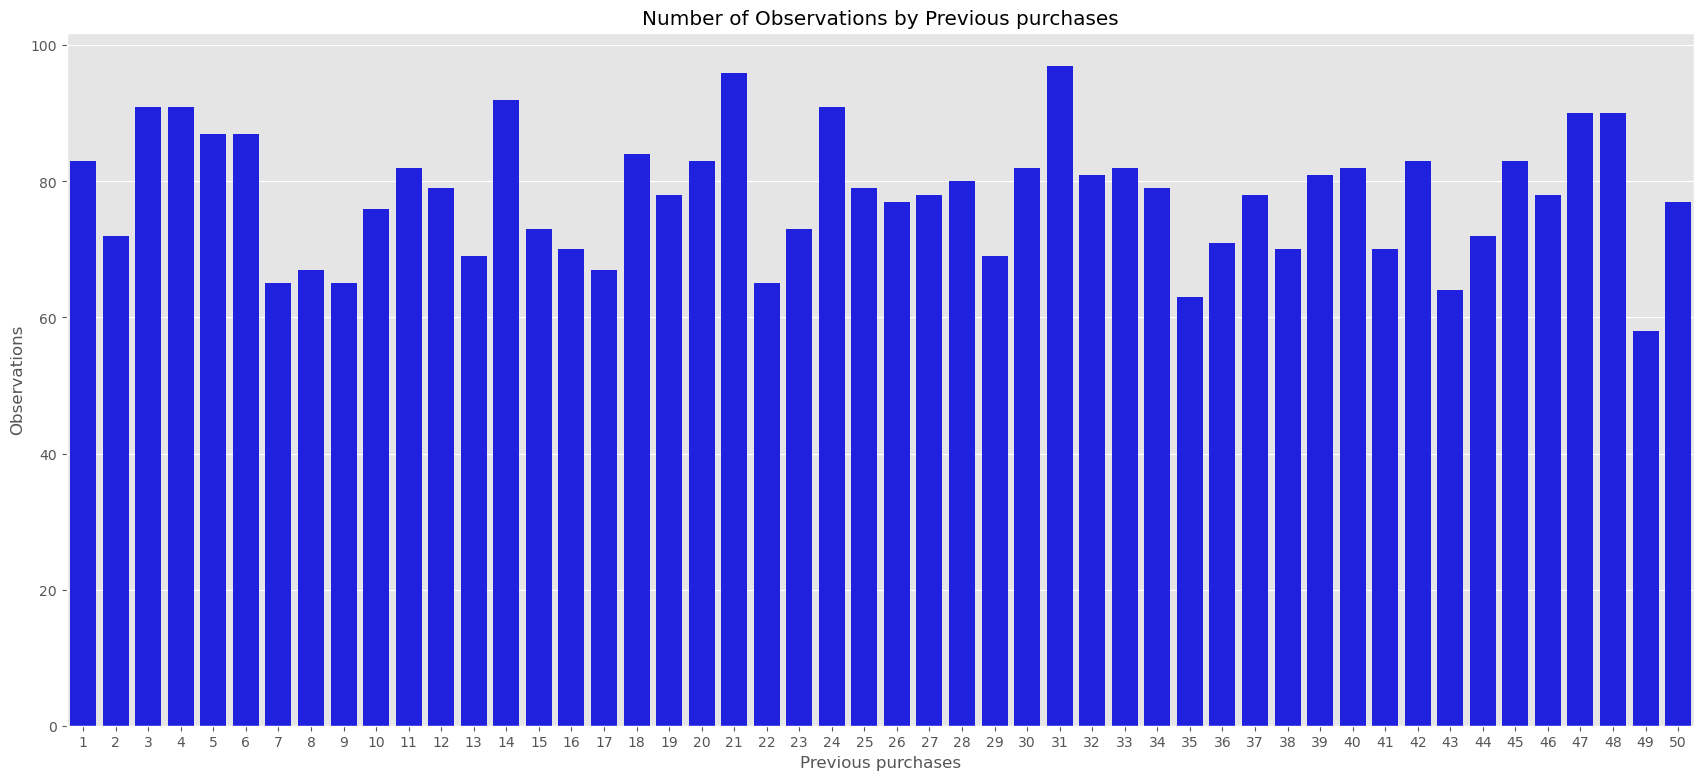

In [17]:
for col in numerical_cols:
    num_plot_count(df_raw, col)

In [18]:
def plot_heatmap(df, columns, figsize=(21, 9), style='fivethirtyeight', cmap_start=200, cmap_end=10):
    plt.figure(figsize=figsize)
    plt.style.use(style)

    corr = df[columns].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(cmap_start, cmap_end, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.show()

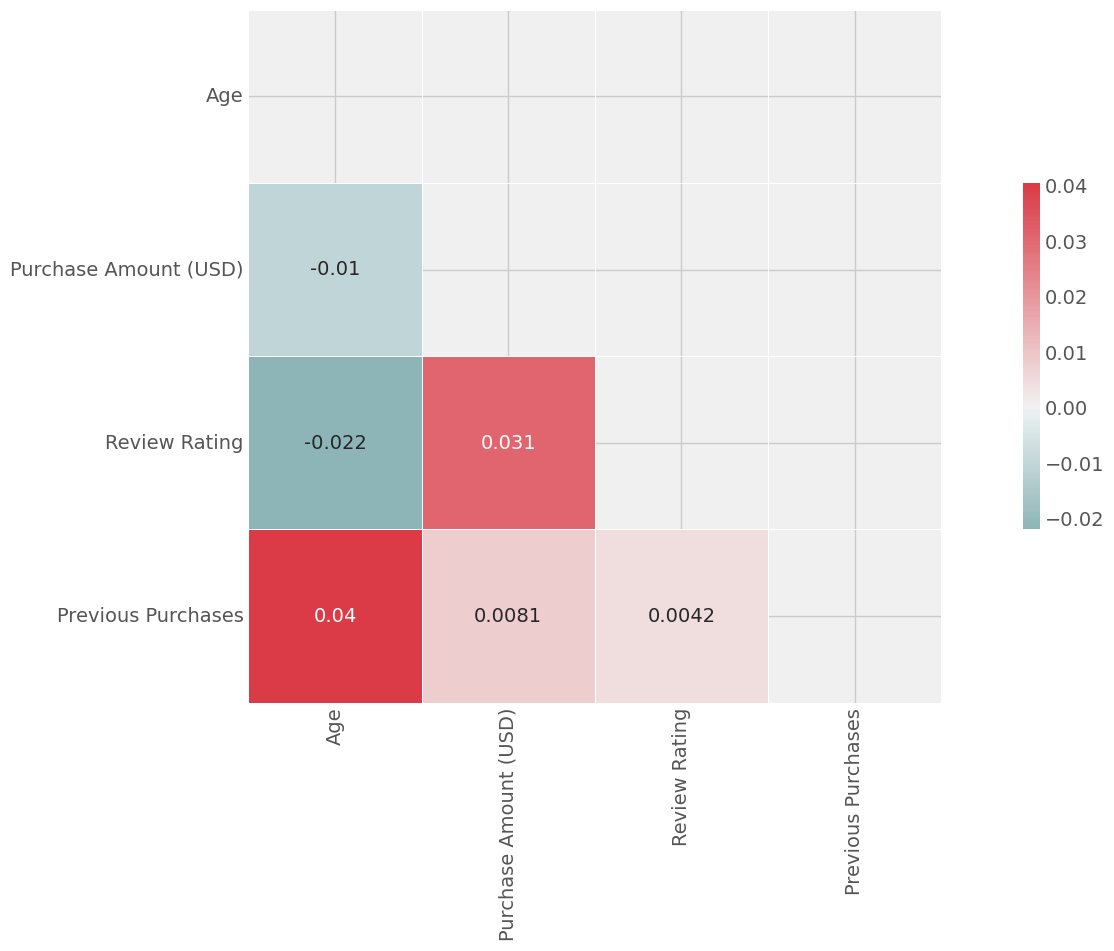

In [19]:
plot_heatmap(df_raw, ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'])

Almost no correlation beteween the numerical variables

# Clean The Data

In [20]:
df_clean = df_raw.copy()

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 57 to 418
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   objec

## Clean Categorical Features

In [22]:
df_clean.drop(columns=['Item Purchased', 'Location', 'Color', 'Season',
                       'Shipping Type', 'Promo Code Used', 'Payment Method'], inplace=True)

- I dropped "Item Purchased" since it contains many items. It is better to use "Category" which specify the category of the item purchased.
- Columns like "Location", "Color", "Season", "Shipping Type" and "Payment Method" might not be very important, so I dropped them.
- I dropped also "Promo Code Used" since I preferred to use "Discount Applied". There was a 1 to 1 correlation between the two columns. 

In [23]:
identical_columns = (df_raw['Promo Code Used'] == df_raw['Discount Applied']).all()
print(identical_columns)

True


In [24]:
df_clean['Gender'] = df_clean['Gender'].map({'Male': 1, 'Female': 0})

size_encoder = OrdinalEncoder(categories=[['S', 'M', 'L', 'XL']])

df_clean['Subscription Status'] = df_clean['Subscription Status'].map({'Yes': 1, 'No': 0})

df_clean['Discount Applied'] = df_clean['Discount Applied'].map({'Yes': 1, 'No': 0})

frequency_encoder = OrdinalEncoder(categories=[['Weekly','Bi-Weekly', 'Fortnightly', 'Monthly', 'Every 3 Months', 'Quarterly', 'Annually']])

categoy_encoder = OrdinalEncoder(categories=[['Clothing','Footwear', 'Outerwear', 'Accessories']])

- I mapped the variables "Gender", "Subscription Status" and "Discount Applied" to 1 (Yes) and 0 (No).
- For "Size", "Frequecy of Purchases" and "Category" I used OrdinalEncoder.

In [25]:
df_clean['Size'] = size_encoder.fit_transform(df_clean['Size'].values.reshape(-1, 1))
df_clean['Frequency of Purchases'] = frequency_encoder.fit_transform(df_clean['Frequency of Purchases'].values.reshape(-1, 1))
df_clean['Category'] = categoy_encoder.fit_transform(df_clean['Category'].values.reshape(-1, 1))

In [26]:
#df_clean.drop(columns=['Category'], inplace=True)
#df_clean.drop(columns=['Size', 'Review Rating'], inplace=True)

In [27]:
df_clean.head()

,Customer ID,Age,Gender,Category,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases
57,58,21,1,2.00,64,1.00,4.40,1,1,17,2.00
3894,3895,66,0,0.00,78,2.00,3.90,0,0,44,4.00
2299,2300,64,1,2.00,57,1.00,3.70,0,0,48,4.00
3716,3717,57,0,0.00,53,1.00,3.40,0,0,42,4.00
104,105,55,1,3.00,24,2.00,4.40,1,1,1,3.00


In [28]:
df_clean.describe()

,Customer ID,Age,Gender,Category,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,0.68,1.27,59.76,1.32,3.75,0.27,0.43,25.35,3.04
std,1125.98,15.21,0.47,1.31,23.69,0.88,0.72,0.44,0.50,14.45,2.00
min,1.00,18.00,0.00,0.00,20.00,0.00,2.50,0.00,0.00,1.00,0.00
25%,975.75,31.00,0.00,0.00,39.00,1.00,3.10,0.00,0.00,13.00,1.00
50%,1950.50,44.00,1.00,1.00,60.00,1.00,3.70,0.00,0.00,25.00,3.00
75%,2925.25,57.00,1.00,3.00,81.00,2.00,4.40,1.00,1.00,38.00,5.00
max,3900.00,70.00,1.00,3.00,100.00,3.00,5.00,1.00,1.00,50.00,6.00


## Clean Numerical Features

In [29]:
scaler = StandardScaler()

In [30]:
cols_to_scale = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']
cols_not_to_scale = ['Customer ID', 'Subscription Status', 'Discount Applied', 'Category', 'Frequency of Purchases', 'Gender', 'Size']

df_to_scale = df_clean[cols_to_scale]
df_not_to_scale = df_clean[cols_not_to_scale]
scaled_data = scaler.fit_transform(df_to_scale)

df_scaled = pd.DataFrame(scaled_data, columns=cols_to_scale)
df_clean_scaled = pd.concat([df_not_to_scale, df_scaled], axis=1)
df_clean_scaled = df_clean_scaled[df_clean.columns]
df_clean_scaled = pd.DataFrame(df_clean_scaled, columns=df_clean.drop(columns=['Customer ID']).columns)

In [31]:
df_clean_scaled.head()

,Age,Gender,Category,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases
57,1.71,1,2.00,-0.75,1.00,1.19,1,1,0.04,2.00
3894,-1.12,0,0.00,0.77,2.00,1.75,0,0,-1.20,4.00
2299,-1.25,1,2.00,1.49,1.00,0.35,0,0,0.53,4.00
3716,-0.40,0,0.00,-0.07,1.00,0.63,0,0,0.11,4.00
104,0.92,1,3.00,0.09,2.00,1.19,1,1,-0.72,3.00


In [32]:
df_clean_scaled.describe()

,Age,Gender,Category,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00,3900.00
mean,-0.00,0.68,1.27,-0.00,1.32,0.00,0.27,0.43,0.00,3.04
std,1.00,0.47,1.31,1.00,0.88,1.00,0.44,0.50,1.00,2.00
min,-1.71,0.00,0.00,-1.68,0.00,-1.75,0.00,0.00,-1.69,0.00
25%,-0.86,0.00,0.00,-0.88,1.00,-0.91,0.00,0.00,-0.86,1.00
50%,-0.00,1.00,1.00,0.01,1.00,-0.07,0.00,0.00,-0.02,3.00
75%,0.85,1.00,3.00,0.90,2.00,0.91,1.00,1.00,0.88,5.00
max,1.71,1.00,3.00,1.70,3.00,1.75,1.00,1.00,1.71,6.00


In [33]:
df_clean_scaled.drop(columns=['Category', 'Discount Applied', 'Subscription Status', 'Size', 'Review Rating'], inplace=True)

In [34]:
df_clean_scaled.head()

,Age,Gender,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
57,1.71,1,-0.75,0.04,2.00
3894,-1.12,0,0.77,-1.20,4.00
2299,-1.25,1,1.49,0.53,4.00
3716,-0.40,0,-0.07,0.11,4.00
104,0.92,1,0.09,-0.72,3.00


# Find Cluster (K) KMeans

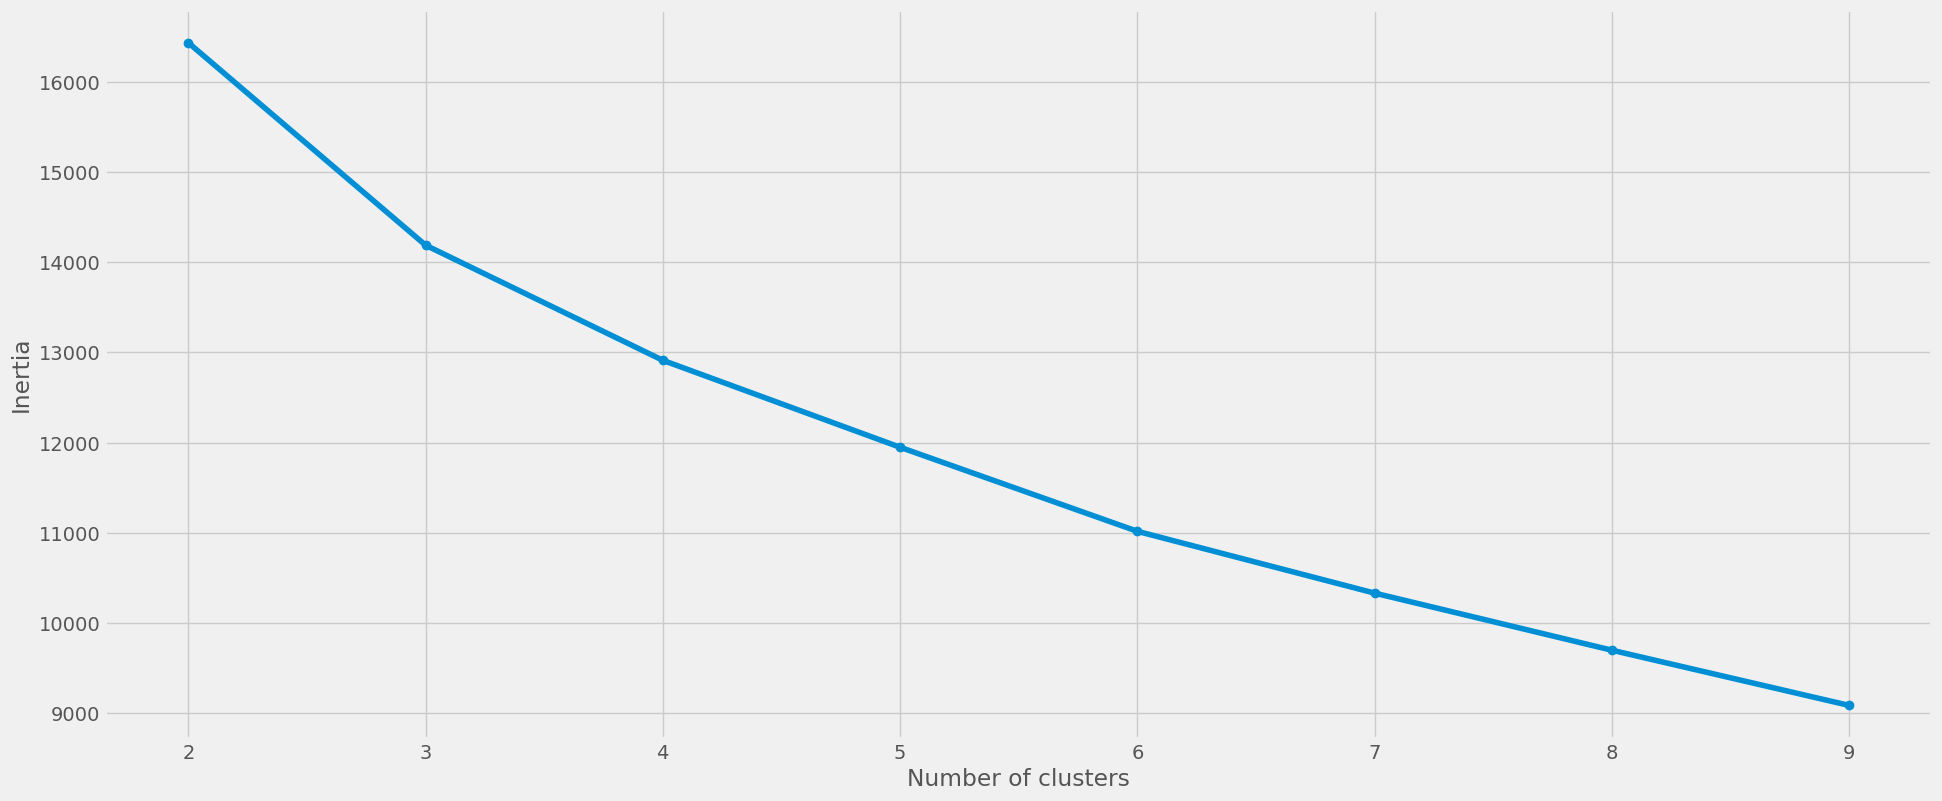

In [35]:
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_clusters = cluster, random_state=42, n_init=10)
    kmeans.fit(df_clean_scaled)
    SSE.append(kmeans.inertia_)

_ = pd.DataFrame({'Cluster':range(2,10, 1), 'SSE':SSE})
plt.figure(figsize=(21,9))
plt.plot(_['Cluster'], _['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
K = 4
kmeans = KMeans(n_clusters = K, n_init=10, random_state=42)
kmeans.fit(df_clean_scaled)
pred = kmeans.predict(df_clean_scaled)

In [37]:
df = pd.DataFrame(df_clean_scaled)
df['cluster'] = pred
df['Customer ID'] = df_clean['Customer ID']
df['cluster'].value_counts()

cluster
0    1095
1    1086
2     861
3     858
Name: count, dtype: int64

# MERGE

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 57 to 418
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   float64
 1   Gender                  3900 non-null   int64  
 2   Purchase Amount (USD)   3900 non-null   float64
 3   Previous Purchases      3900 non-null   float64
 4   Frequency of Purchases  3900 non-null   float64
 5   cluster                 3900 non-null   int32  
 6   Customer ID             3900 non-null   int64  
dtypes: float64(4), int32(1), int64(2)
memory usage: 228.5 KB


In [39]:
df.head()

,Age,Gender,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,cluster,Customer ID
57,1.71,1,-0.75,0.04,2.00,0,58
3894,-1.12,0,0.77,-1.20,4.00,2,3895
2299,-1.25,1,1.49,0.53,4.00,2,2300
3716,-0.40,0,-0.07,0.11,4.00,3,3717
104,0.92,1,0.09,-0.72,3.00,0,105


In [40]:
df_enh = pd.merge(df, df_raw, suffixes=('_x', ''), on='Customer ID')

In [41]:
df_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age_x                     3900 non-null   float64
 1   Gender_x                  3900 non-null   int64  
 2   Purchase Amount (USD)_x   3900 non-null   float64
 3   Previous Purchases_x      3900 non-null   float64
 4   Frequency of Purchases_x  3900 non-null   float64
 5   cluster                   3900 non-null   int32  
 6   Customer ID               3900 non-null   int64  
 7   Age                       3900 non-null   int64  
 8   Gender                    3900 non-null   object 
 9   Item Purchased            3900 non-null   object 
 10  Category                  3900 non-null   object 
 11  Purchase Amount (USD)     3900 non-null   int64  
 12  Location                  3900 non-null   object 
 13  Size                      3900 non-null   object 
 14  Color   

In [42]:
cluster_summary = (
    df_enh
    .groupby('cluster')
    .agg(
        nu_obs=('Customer ID', 'count'),
        avg_age=('Age', 'mean'),
        std_dev_age=('Age', 'std'),
        avg_purchase=('Purchase Amount (USD)', 'mean'),
        max_purchase=('Purchase Amount (USD)', 'max'),
        min_purchase=('Purchase Amount (USD)', 'min'),
        predominant_gender=('Gender', lambda x: x.mode()[0]),
        predominant_category=('Category', lambda x: x.mode()[0]),
        predominant_item=('Item Purchased', lambda x: x.mode()[0]),
        predominant_size=('Size', lambda x: x.mode()[0]),
        avg_rating=('Review Rating', 'mean'),
        median_rating=('Review Rating', 'median'),
        predominant_subscription=('Subscription Status', lambda x: x.mode()[0]),
        predominant_discount=('Discount Applied', lambda x: x.mode()[0]),
        predominant_shipping_type=('Shipping Type', lambda x: x.mode()[0]),
        predominant_payment_method=('Payment Method', lambda x: x.mode()[0]),
        predominant_frequency=('Frequency of Purchases', lambda x: x.mode()[0]),
        avg_previous_purchases=('Previous Purchases', 'mean')
    )
    .reset_index()
    .sort_values('avg_age')
)


In [43]:
with pd.option_context('display.max_columns', None):
    display(cluster_summary)

,cluster,nu_obs,avg_age,std_dev_age,avg_purchase,max_purchase,min_purchase,predominant_gender,predominant_category,predominant_item,predominant_size,avg_rating,median_rating,predominant_subscription,predominant_discount,predominant_shipping_type,predominant_payment_method,predominant_frequency,avg_previous_purchases
1,1,1086,43.92,15.05,59.84,100,20,Male,Clothing,Sweater,M,3.73,3.70,No,No,Express,Cash,Bi-Weekly,25.28
0,0,1095,43.94,15.02,59.19,100,20,Male,Clothing,Pants,M,3.77,3.80,No,No,Standard,Credit Card,Monthly,25.27
3,3,858,44.00,15.27,60.88,100,20,Male,Clothing,Socks,M,3.77,3.80,No,No,Free Shipping,Debit Card,Every 3 Months,25.47
2,2,861,44.49,15.59,59.28,100,20,Male,Clothing,Blouse,M,3.73,3.70,No,No,Free Shipping,PayPal,Annually,25.43
